# Data Understanding

**Kolom pada dataset**
<BR><BR>1. trans_date_trans_time:<BR>Waktu transaksi. Dapat digunakan untuk mendeteksi pola waktu (misal transaksi yang sering terjadi pada waktu yang tidak wajar bisa dicurigai sebagai fraud).
<BR><BR>2. cc_num:<BR>Nomor kartu kredit. Informasi penting terkait pengguna kartu, tetapi tidak langsung membantu mendeteksi fraud kecuali ada pola dari penggunaan kartu yang tidak biasa.
<BR><BR>3. merchant:<BR>Nama merchant (penjual). Merchant tertentu mungkin lebih sering terlibat dalam transaksi fraud, sehingga bisa membantu mendeteksi risiko terkait merchant.
<BR><BR>4. category:<BR>Kategori transaksi. Fraud mungkin lebih sering terjadi dalam kategori tertentu seperti barang mewah atau hiburan, yang memiliki nilai transaksi lebih tinggi.
<BR><BR>5. amt:<BR>Jumlah uang dalam transaksi. Nilai transaksi yang sangat besar atau tidak sesuai dengan pola belanja biasanya bisa menjadi tanda fraud.
<BR><BR>6. first:<BR>Nama depan pemegang kartu. Tidak terlalu relevan dalam mendeteksi fraud secara langsung.
<BR><BR>7. last:<BR>Nama belakang pemegang kartu. Sama seperti first, tidak relevan secara langsung.
<BR><BR>8. gender:<BR>Jenis kelamin pemegang kartu. Bisa digunakan untuk melihat pola demografis terkait fraud, meskipun tidak secara langsung mengindikasikan fraud.
<BR><BR>9. street:<BR>Alamat jalan pemegang kartu. Dapat digunakan dalam deteksi anomali jika lokasi transaksi berbeda jauh dari alamat pemegang kartu.
<BR><BR>10. city:<BR>Kota pemegang kartu. Sama seperti street, dapat digunakan untuk memeriksa ketidaksesuaian antara lokasi pemegang kartu dan transaksi.
<BR><BR>11. state:<BR>Negara bagian pemegang kartu. Sama dengan city, bisa mendeteksi anomali lokasi.
<BR><BR>12. zip:<BR>Kode pos pemegang kartu. Sama dengan city dan state, bisa membantu mendeteksi anomali geografis.
<BR><BR>13. lat:<BR>Garis lintang lokasi pemegang kartu. Lokasi geografis dapat membantu mendeteksi ketidaksesuaian jika dibandingkan dengan lokasi transaksi.
<BR><BR>14. long:<BR>Garis bujur lokasi pemegang kartu. Sama dengan lat, membantu mendeteksi lokasi.
<BR><BR>15. city_pop:<BR>Populasi kota pemegang kartu. Bisa digunakan untuk memahami risiko terkait daerah, misalnya daerah padat penduduk mungkin memiliki lebih banyak transaksi dan risiko.
<BR><BR>16. job:<BR>Pekerjaan pemegang kartu. Pekerjaan dengan penghasilan tinggi mungkin lebih rentan terhadap fraud karena lebih sering terlibat dalam transaksi besar.
<BR><BR>17. dob:<BR>Tanggal lahir pemegang kartu. Usia pemegang kartu bisa menjadi faktor, misalnya kelompok usia tertentu mungkin lebih rentan terhadap fraud.
<BR><BR>18. trans_num:<BR>ID unik untuk transaksi. Tidak relevan dalam deteksi fraud secara langsung.
<BR><BR>19. unix_time:<BR>Waktu transaksi dalam format unix. Sama seperti trans_date_trans_time, membantu dalam menganalisis pola waktu.
<BR><BR>20. merch_lat:<BR>Garis lintang merchant. Dapat digunakan untuk mendeteksi ketidaksesuaian antara lokasi merchant dan pemegang kartu.
<BR><BR>21. merch_long:<BR>Garis bujur merchant. Sama seperti merch_lat, membantu mendeteksi anomali lokasi.
<BR><BR>22. is_fraud:<BR>Label apakah transaksi adalah fraud (0 = tidak fraud, 1 = fraud). Ini adalah target yang perlu diprediksi.


# Load Data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


# Exploratory Data Analysis & Data Preparation

In [ ]:
# check proportion of unique values
data['is_fraud'].value_counts(normalize=True)

,proportion
is_fraud,
0,0.994211
1,0.005789


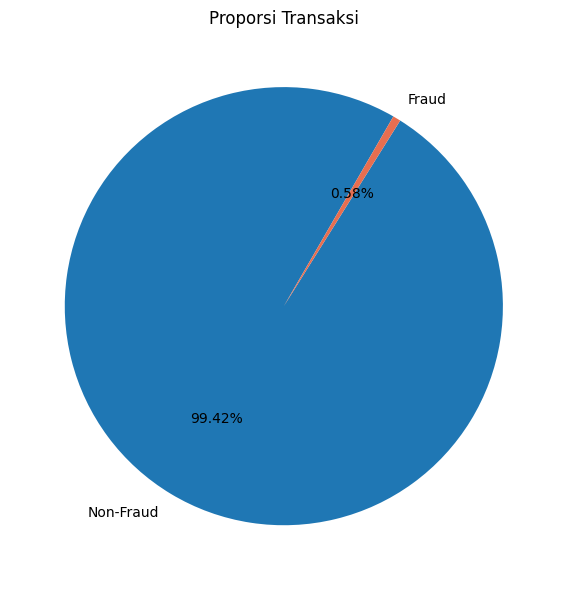

In [ ]:
# check percentage of fraudulent and non-fraudulent
fraudCounts = data['is_fraud'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fraudCounts, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%', startangle=60, colors=['#1f77b4', '#E76E50'])
plt.title('Proporsi Transaksi')

plt.tight_layout()
plt.show()

In [ ]:
fraudTransactions = data[data['is_fraud'] == 1]

# change dtype
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# time extraction
fraudTransactions['hour'] = fraudTransactions['trans_date_trans_time'].dt.hour

# calculate sum of transactions for every hours
fraud_by_hour = fraudTransactions['hour'].value_counts().sort_index()

fraud_by_hour

AttributeError: Can only use .dt accessor with datetimelike values

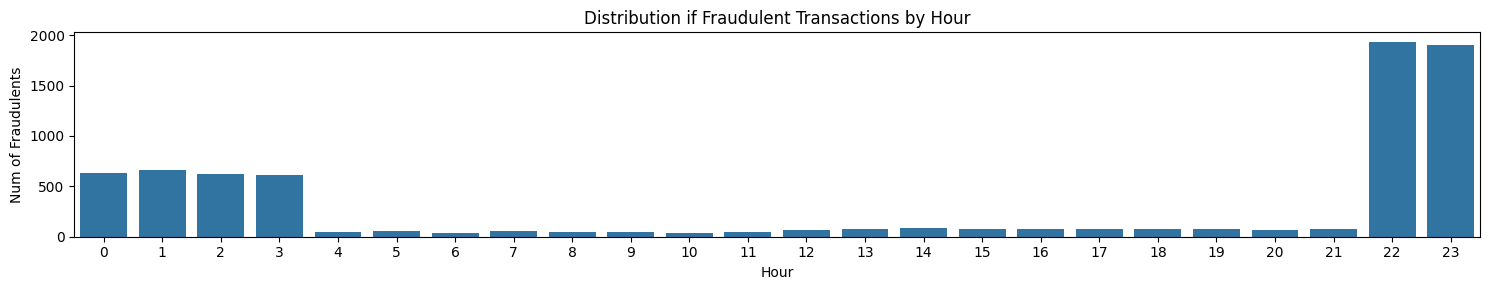

In [ ]:
# visualize transactions distribution by hour
plt.figure(figsize=(15,3))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Num of Fraudulents')
plt.title('Distribution if Fraudulent Transactions by Hour')

plt.tight_layout()
plt.show()

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour

In [ ]:
data['hour']

,hour
0,0
1,0
2,0
3,0
4,0
...,...
1296670,12
1296671,12
1296672,12
1296673,12


In [ ]:
# create the 'hour_risk_category' column based on the specified criteria
data['hour_risk_category'] = data['hour'].apply(lambda x: 2 if x in [22, 23, 0, 1, 2, 3] else 1)

data[['hour', 'hour_risk_category']].head(20)

,hour,hour_risk_category
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
5,0,2
6,0,2
7,0,2
8,0,2
9,0,2


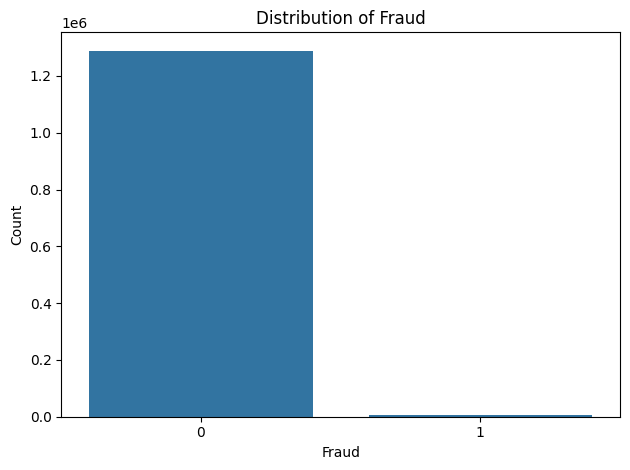

In [ ]:
fraud_counts = data['is_fraud'].value_counts()

sns.barplot(x = fraud_counts.index, y = fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Feature Engineering
* transaction_time = object dtype, should be converted into datetime dtype, then extract hour, date, year features and add them into combined df
* dob = object dtype, should be converted into datetime dtype as well. from ‘transaction_time’ and ‘birthday’ features, we can deduce the ‘age’ feature of the users when their transactions are made.
* age = can create categorical feature like "less than 20" or "between 30 and 40", "older than 50??"
* long & lat = help us to calculate longitude & latitude coordinates, we can create distance feature.
*gender = rename M and F?? OHE??

In [ ]:
# Drop unused cols
unused_cols = ['Unnamed: 0', 'first', 'last', 'cc_num', 'trans_num']
data.drop(columns=unused_cols, inplace=True) #

# Action Items : New Features, OHE , Label Encoder (bertingkat), < 20 drop
category = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'zip', 'job', 'unix_time']

# Action Items : New Features = Distance
location = ['lat', 'long', 'merch_lat', 'merch_long'] #

# Action Items : New Features = Risk Time, Risk Day, Age
datetime = ['trans_date_trans_time', 'dob'] #

# Action Items : New Features : city_pop category, amt category
numerical = ['amt', 'city_pop'] #

target = ['is_fraud']

In [ ]:
data['day'] = data['trans_date_trans_time'].dt.day

In [ ]:
data['day']

,day
0,1
1,1
2,1
3,1
4,1
...,...
1296670,21
1296671,21
1296672,21
1296673,21


In [ ]:
# extract the day of the week (Monday=0, Sunday=6)
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek

# create mapping for day names
day_names = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# m,ap the day of the week numbers to day names
data['days'] = data['day_of_week'].map(lambda x: day_names[x])

# display the updated Df with the 'days' column
print(data[['trans_date_trans_time', 'day_of_week', 'days']].head())

  trans_date_trans_time  day_of_week    days
0   2019-01-01 00:00:18            1  Selasa
1   2019-01-01 00:00:44            1  Selasa
2   2019-01-01 00:00:51            1  Selasa
3   2019-01-01 00:01:16            1  Selasa
4   2019-01-01 00:03:06            1  Selasa


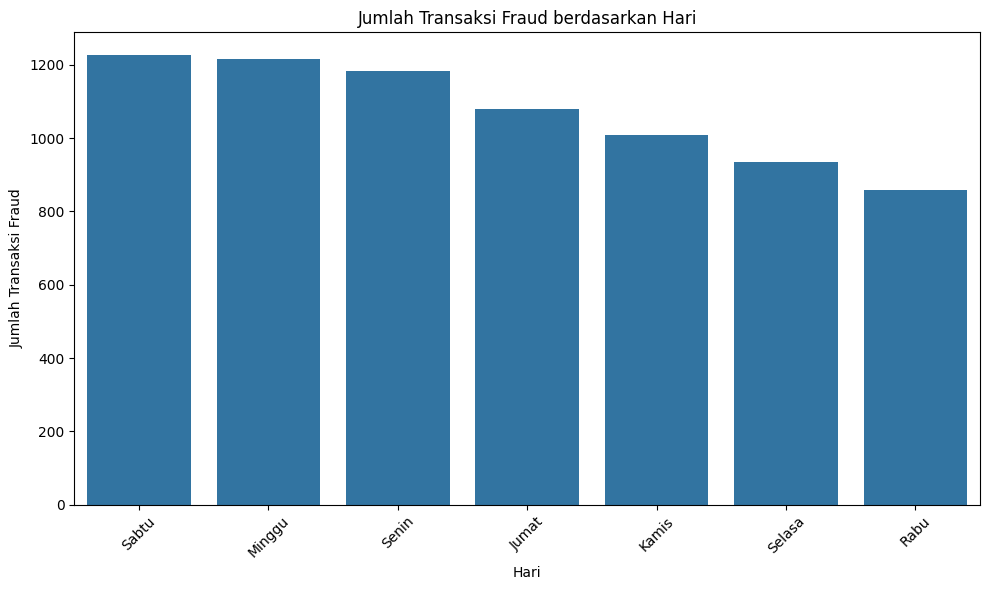

In [ ]:
# sum of fraudulent transactions per day
fraudulent_transactions = data[data['is_fraud'] == 1]

fraud_by_day = fraudulent_transactions['days'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values)
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi Fraud')
plt.title('Jumlah Transaksi Fraud berdasarkan Hari')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# convert 'dob' and 'trans_date_trans_time' to datetime objects
data['dob'] = pd.to_datetime(data['dob'])
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# calculate the age in years
data['age'] = (data['trans_date_trans_time'] - data['dob']).dt.days / 365.25
data['age'] = data['age'].astype(int)

data['age']

,age
0,30
1,40
2,56
3,51
4,32
...,...
1296670,58
1296671,40
1296672,52
1296673,39


In [ ]:
from geopy.distance import geodesic

# calculate distance
def calculate_distance(row):
    try:
        coords_1 = (row['lat'], row['long'])
        coords_2 = (row['merch_lat'], row['merch_long'])
        return geodesic(coords_1, coords_2).km
    except:
        return np.nan

data['distance'] = data.apply(calculate_distance, axis=1)
data['distance']

,distance
0,78.773821
1,30.216618
2,108.102912
3,95.685115
4,77.702395
...,...
1296670,119.696415
1296671,75.202184
1296672,98.987927
1296673,84.688356


In [ ]:
# calculate distance percentiles
distance_percentiles = data['distance'].quantile([0.25, 0.75])

# create distance category
def categorize_distance(distance):
    if distance <= distance_percentiles[0.25]:
        return 1 #'low_dist'
    elif distance <= distance_percentiles[0.75]:
        return 2 #'med_dist'
    else:
        return 3 #'high_dist'

data['distance_category'] = data['distance'].apply(categorize_distance)
data['distance_category']

,distance_category
0,2
1,1
2,3
3,2
4,2
...,...
1296670,3
1296671,2
1296672,3
1296673,2


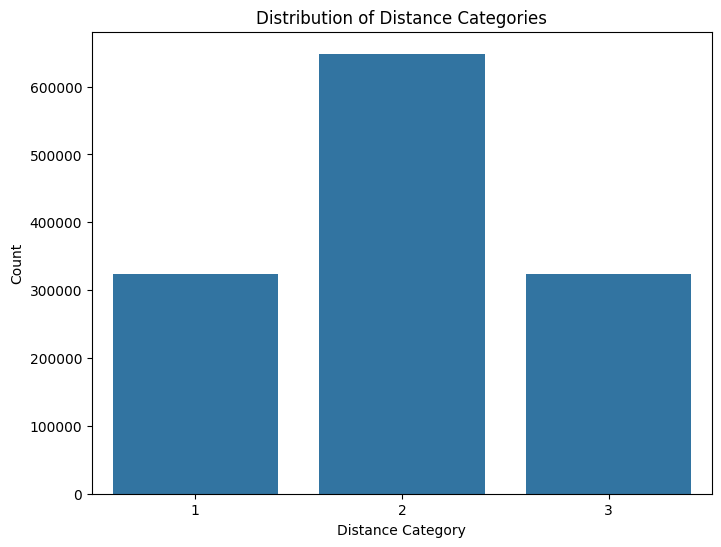

In [ ]:
# count distribution  of distance categories
distance_counts = data['distance_category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=distance_counts.index, y=distance_counts.values)
plt.xlabel('Distance Category')
plt.ylabel('Count')
plt.title('Distribution of Distance Categories')

plt.show()

In [ ]:
# Calculate amt percentiles
amount = data['amt'].quantile([0.25, 0.75])

# Create amt category
def categorize_distance(amt):
    if amt <= amount [0.25]:
        return 1 #'low_dist'
    elif amt <= amount [0.75]:
        return 2 #'med_dist'
    else:
        return 3 #'high_dist'

data['amount'] = data['amt'].apply(categorize_distance)
data['amount']

,amount
0,1
1,3
2,3
3,2
4,2
...,...
1296670,2
1296671,2
1296672,3
1296673,2


In [ ]:
population = data['city_pop'].quantile([0.25, 0.75])

# Create city_pops category
def categorize_distance(city_pops):
    if city_pops <= amount [0.25]:
        return 1 #'low_dist'
    elif city_pops <= amount [0.75]:
        return 2 #'med_dist'
    else:
        return 3 #'high_dist'

data['population'] = data['city_pop'].apply(categorize_distance)
data['population']

,population
0,3
1,3
2,3
3,3
4,3
...,...
1296670,3
1296671,3
1296672,3
1296673,3


In [ ]:
# check n unique values from each columns
for col in category:
  print(f"Unique values for column '{col}': {data[col].nunique()}")

Unique values for column 'merchant': 693
Unique values for column 'category': 14
Unique values for column 'gender': 2
Unique values for column 'street': 983
Unique values for column 'city': 894
Unique values for column 'state': 51
Unique values for column 'zip': 970
Unique values for column 'job': 494
Unique values for column 'unix_time': 1274823


In [ ]:
# drop columns in 'category' list with more than 20 unique values
for col in category:
  if data[col].nunique() > 20:
    data.drop(columns=col, inplace=True)
    print(f"Column '{col}' dropped because it has more than 20 unique values.")


Column 'merchant' dropped because it has more than 20 unique values.
Column 'street' dropped because it has more than 20 unique values.
Column 'city' dropped because it has more than 20 unique values.
Column 'state' dropped because it has more than 20 unique values.
Column 'zip' dropped because it has more than 20 unique values.
Column 'job' dropped because it has more than 20 unique values.
Column 'unix_time' dropped because it has more than 20 unique values.


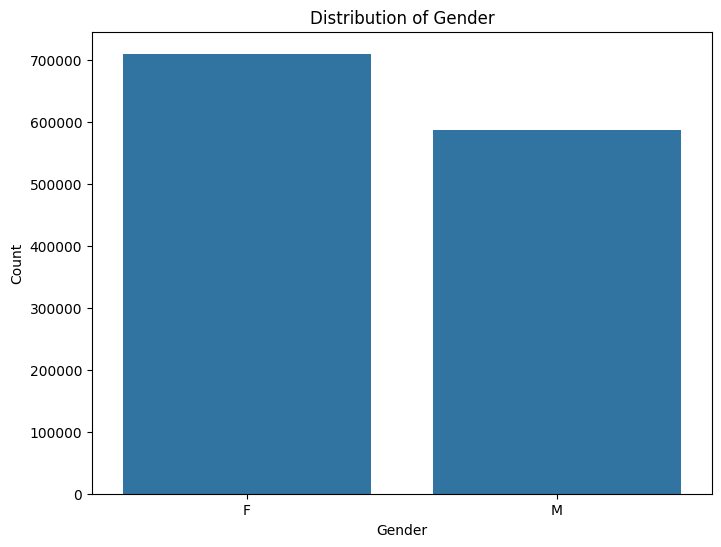

In [ ]:
# count distribution of gender
gender_counts = data['gender'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

plt.show()

In [ ]:
# Replace 'M' with 0 and 'F' with 1 in the 'gender' column
data['gender'] = data['gender'].replace({'M': 0, 'F': 1})

<ipython-input-77-4947a02e5c10>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'M': 0, 'F': 1})


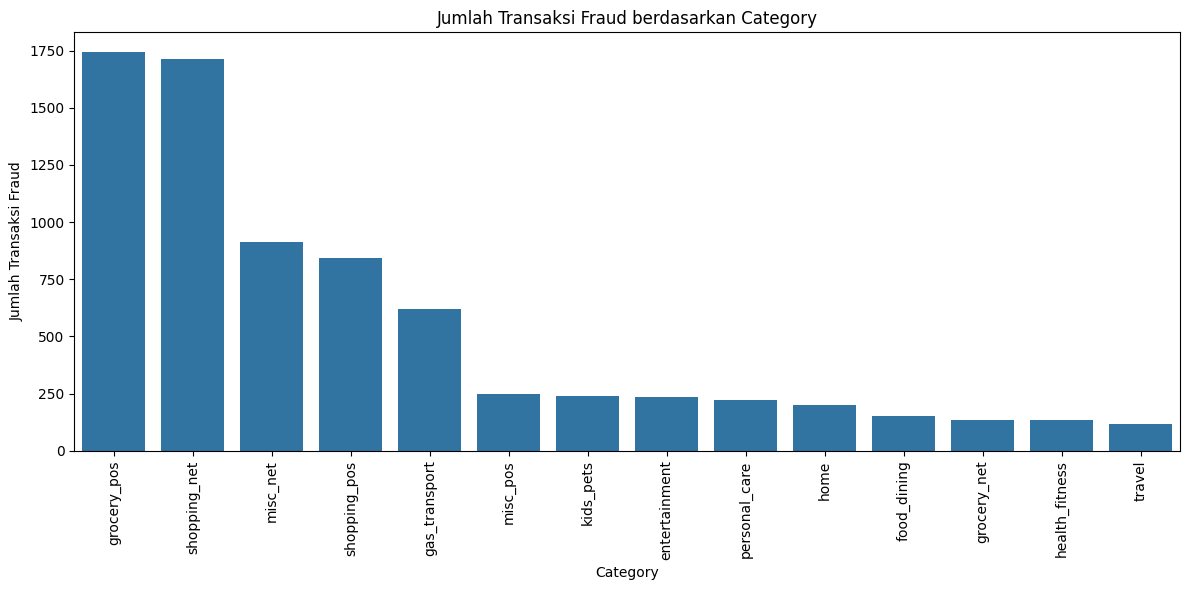

In [ ]:
# fraudulent transaction based on categories
fraudulent_transactions = data[data['is_fraud'] == 1]

fraud_by_category = fraudulent_transactions['category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values)
plt.xlabel('Category')
plt.ylabel('Jumlah Transaksi Fraud')
plt.title('Jumlah Transaksi Fraud berdasarkan Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
# Define high-risk categories
high_risk_categories = ['grocery_pos', 'shopping_net', 'misc_net', 'shopping_pos', 'gas_transport']

# Create the 'category_risk' column
data['category_risk'] = data['category'].apply(lambda x: 2 if x in high_risk_categories else 1)
data['category_risk']

,category_risk
0,2
1,2
2,1
3,2
4,1
...,...
1296670,1
1296671,1
1296672,1
1296673,1


## Label Encoding

In [ ]:
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# encoder = LabelEncoder()
# # category = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'zip', 'job', 'unix_time']

# for col in category:
#     data[col] = encoder.fit_transform(data[col])

# data.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,...,job,unix_time,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,age
0,514,8,4.97,0,568,526,27,265,36.0788,-81.1781,...,370,0,36.011293,-82.048315,0,1,1,2019,0,31
1,241,4,107.23,0,435,612,47,965,48.8878,-118.2105,...,428,1,49.159047,-118.186462,0,1,1,2019,0,41
2,390,0,220.11,1,602,468,13,858,42.1808,-112.2620,...,307,2,43.150704,-112.154481,0,1,1,2019,0,57
3,360,2,45.00,1,930,84,26,614,46.2306,-112.1138,...,328,3,47.034331,-112.561071,0,1,1,2019,0,52
4,297,9,41.96,1,418,216,45,231,38.4207,-79.4629,...,116,4,38.674999,-78.632459,0,1,1,2019,0,33


# Train Test Split & Scaling

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,hour,hour_risk_category,day,day_of_week,days,age,distance,distance_category,amount,population,category_risk
0,2019-01-01 00:00:18,misc_net,4.97,1,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,0,2,1,1,Selasa,30,78.773821,2,1,3,2
1,2019-01-01 00:00:44,grocery_pos,107.23,1,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0,2,1,1,Selasa,40,30.216618,1,3,3,2
2,2019-01-01 00:00:51,entertainment,220.11,0,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,0,2,1,1,Selasa,56,108.102912,3,3,3,1
3,2019-01-01 00:01:16,gas_transport,45.00,0,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,0,2,1,1,Selasa,51,95.685115,2,2,3,2
4,2019-01-01 00:03:06,misc_pos,41.96,0,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,0,2,1,1,Selasa,32,77.702395,2,2,3,1


In [ ]:
data.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'lat', 'long',
       'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud', 'hour',
       'hour_risk_category', 'day', 'day_of_week', 'days', 'age', 'distance',
       'distance_category', 'amount', 'population', 'category_risk'],
      dtype='object')

In [ ]:
unused_cols = ['trans_date_trans_time', 'category', 'lat', 'long',
       'city_pop', 'dob', 'merch_lat', 'merch_long', 'hour',
       'day', 'day_of_week', 'days', 'distance',
       ]
data.drop(columns=unused_cols, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Modelling

## Random Forest

In [ ]:
# train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.9985154337054389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.98      0.76      0.86      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.88      0.93    259335
weighted avg       1.00      1.00      1.00    259335



## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluasi model
print(f"Train Accuracy: {model.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {model.score(X_test, y_test):.4f}")

Train Accuracy: 0.9936
Test Accuracy: 0.9937


In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,target_names=["non_fraud", "fraud"]))

Accuracy Score: 0.9937185493666493

Classification Report:
               precision    recall  f1-score   support

   non_fraud       0.99      1.00      1.00    257834
       fraud       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



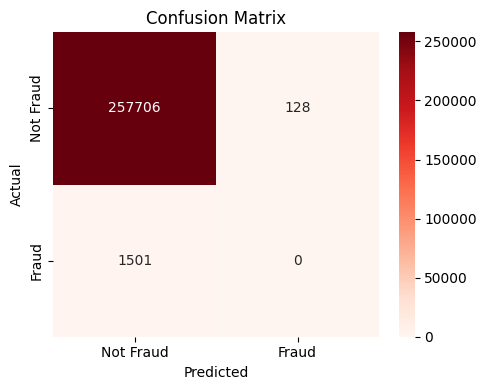

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

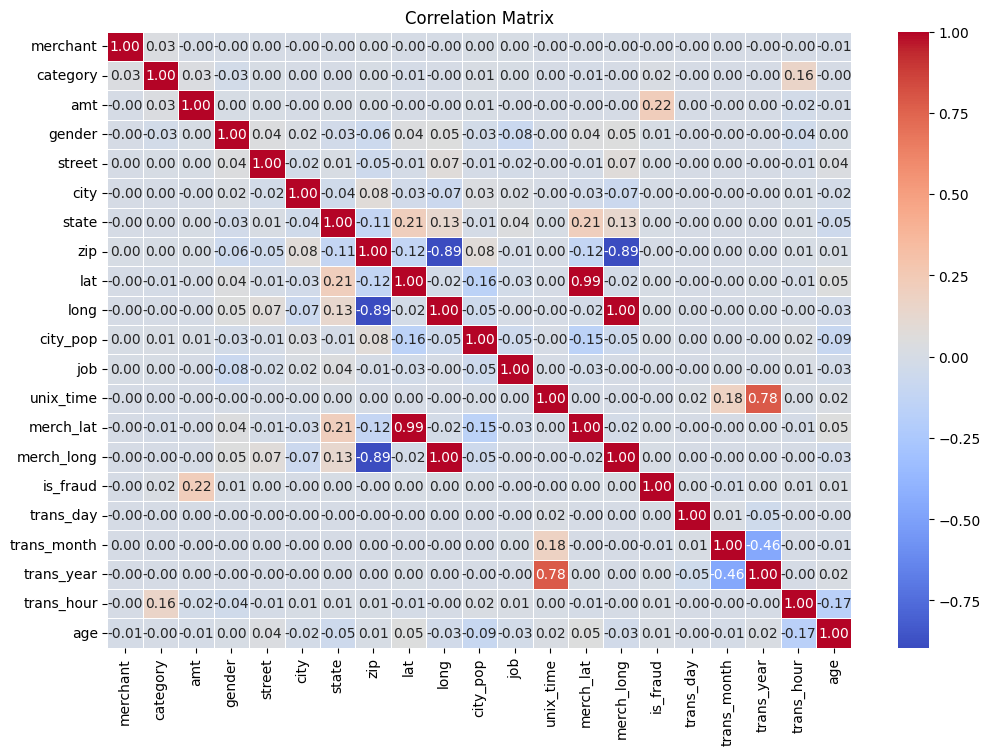

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()